<a href="https://colab.research.google.com/github/tarciobezerra/template_portfolio/blob/master/Analisando_os_Dados_do_Airbnb_ipynb_(Buenos_Aires).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*
**Personalizado por Tárcio R. Bezerra**
---

# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

## Obtenção dos Dados
Todos os dados usados para esta análise foram obtidos do site do AirBNB ([inside AirBNB](http://insideairbnb.com/get-the-data.html)).

Para uma análise mais simples, um dataset enxuto foi selecionado:

* 'listing.csv' - *Summary information and metrics for listings in Amsterdam (good for visualisations).*



In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-04-26/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,3983,2,26,2019-11-28,0.27,1,365
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1593,1,20,2017-12-11,0.16,1,365
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,2987,1,1,2018-12-18,0.06,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,2987,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2987,1,66,2019-11-27,1.89,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [14]:
# identificar o volume de dados do DataFrame
print("Número de instâncias:\t {}".format(df.shape[0]))
print("Número de colunas:\t {}\n".format(df.shape[1]))

# verificar os tipos de dados do dataset
print("Os tipos de dados das colunas seguem abaixo:\n")
display(df.dtypes);

Número de instâncias:	 23729
Número de colunas:	 16

Os tipos de dados das colunas seguem abaixo:



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A quanlidade de um dataset está diretamente relacionada com a quantidade de valores ausentes. Vamos entender o percentual de valores nulos nas entradas de nosso dataset?
* É possível ver que neighbrurhood_group nã é usado para nada. Tudo está vazio.
* Podemos ver que reviews_per_month e last_review tem quase 30% de valores ausentes.

In [18]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.274221
last_review                       0.274221
name                              0.000421
host_name                         0.000126
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para entender a distribuição dos valores das variáveis do nosso dataset, vamos plotar histogramas.

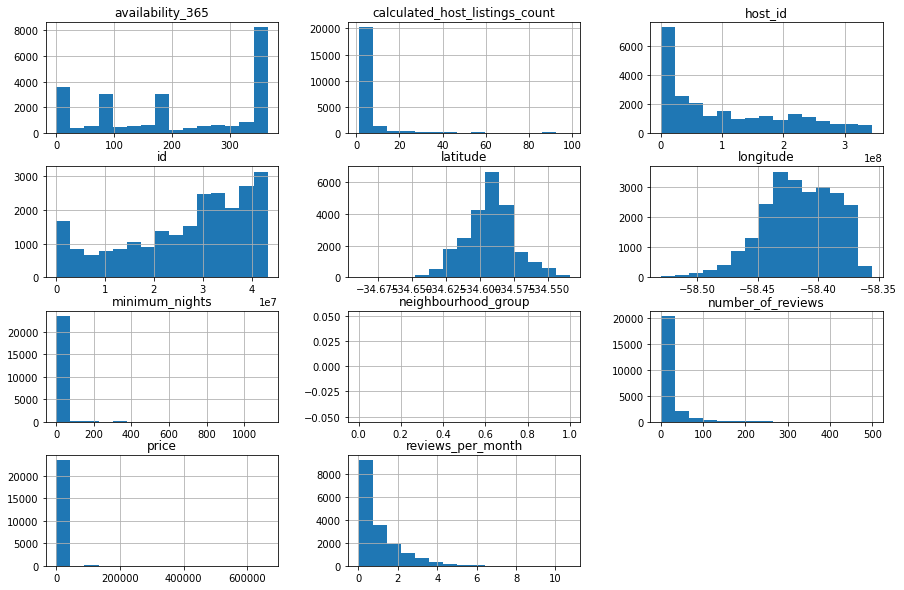

In [20]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há presença de *Outliers*?**

Verificamos, pela análise visual dos histogramas, que há valores que distoam nos atributos *price* , *minimum_nights* e *calculated_host_listing_count.

Para investigar isto, existem procedimentos que auxiliam a detecção de outliers. São eles:

* Resumo estatístico por meio do método *describe*
* Plotar *boxplot para a variável

In [29]:
# convertendo 'price' para reais
df.price = df.price*0.72

# vamos ver o resumo estatístico das variáveis
df[['price', 'minimum_nights', 'calculated_host_listings_count']].describe()



,price,minimum_nights,calculated_host_listings_count
count,23729.000000,23729.000000,23729.000000
mean,776.845358,6.027519,6.272704
std,3110.443245,25.635455,14.675388
min,0.000000,1.000000,1.000000
25%,269.727518,1.000000,1.000000
50%,410.976505,3.000000,1.000000
75%,642.199162,4.000000,4.000000
max,128426.674972,1125.000000,99.000000


#### Boxplot para *price*

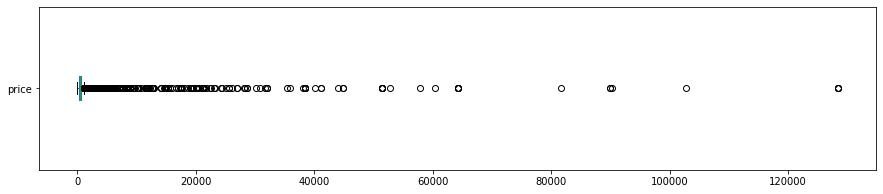


Preços acima de R$1.500,00
1334 entradas
5.6218% 


In [36]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3),)
mpl.show()

# ver quantidade de diárias acima de R$1.500,00
print("\nPreços acima de R$1.500,00")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}% ".format((len(df[df.price > 1500]) / df.shape[0])*100));



#### Boxplot para minimum_nights

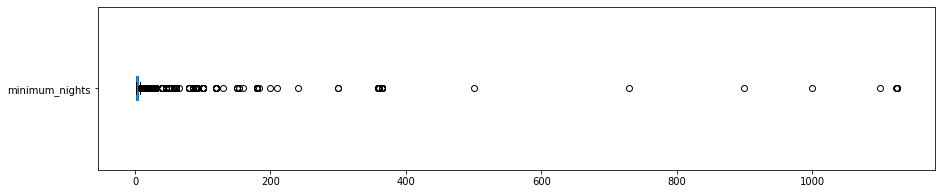


Aluguéis acima de 30 diárias
339 entradas
1.4286% 


In [37]:
# minimum nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3),)
mpl.show()

# ver quantidade de diárias acima de 30 dias
print("\nAluguéis acima de 30 diárias")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}% ".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100));

#### Histogramas sem outliers

In [0]:
# Removendo os *outliers* em um novo DataFrame 
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# Remover a coluna 'neighbourhood_group', pois está vazia
df_clean.drop('neighbourhood_group', axis=1, inplace=True)


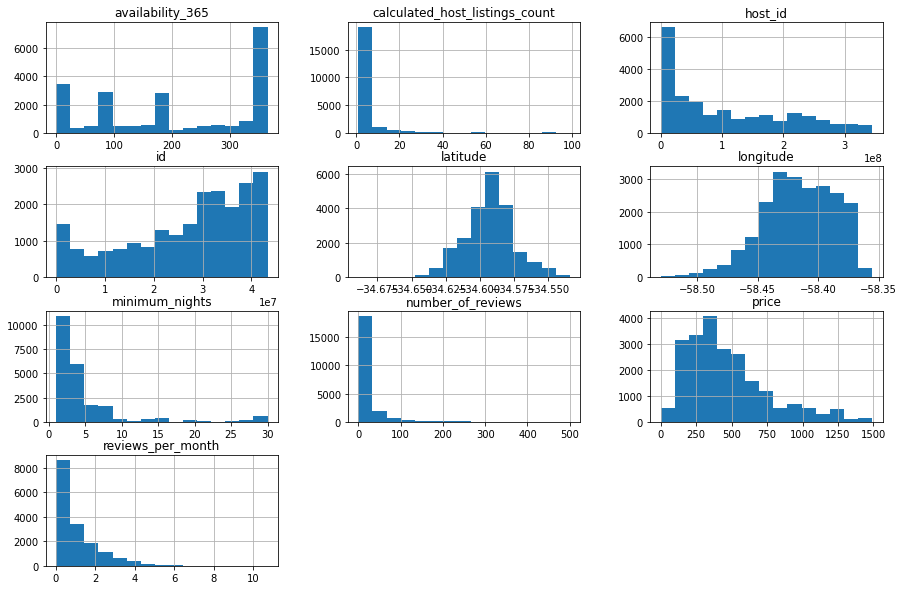

In [45]:
# Plotar os histogramas do DataFrame limpo
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

Nesta análise exploratória, estamos buscando a correlação entre pares de variáveis. Esta correlação pode ser medida pelo índice de correlação. Para isto, vamos:

* Criar uma matriz de correlação
* Gerar um mapa de calor a partir desta matriz

In [47]:
# criar uma matriz de correlação
corr =  df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.018679,0.037103,0.000139,0.158514,0.142755
minimum_nights,-0.018679,1.000000,-0.099020,-0.151937,0.094322,0.028089
number_of_reviews,0.037103,-0.099020,1.000000,0.628894,-0.055213,0.078477
reviews_per_month,0.000139,-0.151937,0.628894,1.000000,-0.083683,-0.016616
calculated_host_listings_count,0.158514,0.094322,-0.055213,-0.083683,1.000000,0.095369
availability_365,0.142755,0.028089,0.078477,-0.016616,0.095369,1.000000


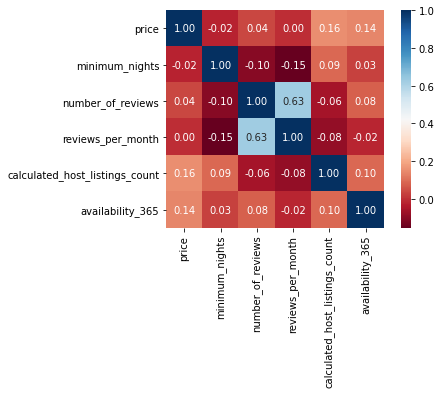

In [49]:
# plotar um heatmap a partir das correlações
sb.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [53]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    16947
Private room        4356
Shared room          536
Hotel room           239
Name: room_type, dtype: int64

In [61]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print("Tipo de acomodação\t %\n")
(df_clean.room_type.value_counts() / df_clean.shape[0])*100

Tipo de acomodação	 %



Entire home/apt    76.759670
Private room       19.730048
Shared room         2.427756
Hotel room          1.082526
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Buenos Aires?**

Uma maneira de se mostrar uma variável em função de outra é usando o método *groupby()*. Neste caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação. 


In [62]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Puerto Madero    819.796959
Villa Soldati    727.851516
Palermo          548.087023
Retiro           516.472115
Recoleta         514.354842
Versalles        500.867250
San Telmo        453.211473
San Nicolas      450.089187
Villa Devoto     448.178906
Nuñez            448.134803
Name: price, dtype: float64

Devemos atentar, entretanto, que esta informação pode estar distorcida. Observamos que a localodade Vila Soldati tem um preço médio superior à badalada Palermo Soho. Abaixo fazemos um levantamento da quantidade de imóveis existentes em cada localidade de Buenos Aires. Constatamos, por exemplo, que em Vila Soldati só há 3 imóveis disponíveis, o que puxa a média para cima.

In [78]:
# Ver a quantidade de imóveis por localidade
df_clean.groupby(['neighbourhood']).id.count().sort_values(ascending=False)

neighbourhood
Palermo              6556
Recoleta             3608
San Nicolas          1309
Retiro               1131
Balvanera            1118
Belgrano             1020
Monserrat             947
Almagro               930
Villa Crespo          755
San Telmo             691
Caballito             443
Nuñez                 442
Colegiales            427
Chacarita             384
Constitucion          310
Villa Urquiza         233
Puerto Madero         175
Barracas              161
San Cristobal         143
Saavedra              132
Boca                  127
Boedo                 113
Flores                110
Villa Ortuzar          91
Coghlan                86
Parque Patricios       69
Villa Devoto           67
Villa Del Parque       54
Parque Chacabuco       53
Parque Chas            49
Villa Pueyrredon       41
Floresta               38
Agronomia              31
Villa Gral. Mitre      31
Paternal               26
Villa Santa Rita       24
Velez Sarsfield        22
Villa Luro             2

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

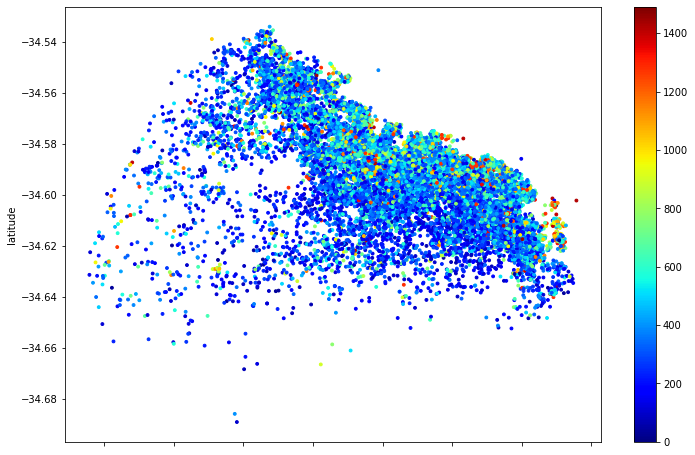

In [82]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter",x='longitude', y='latitude', c=df_clean['price'], s=8,
              cmap=mpl.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**



In [86]:
# ver a média da coluna `minimum_nights``
print("A média de dias mínimos de estadia é {:.2f}".format(df_clean.minimum_nights.mean()))

A média de dias mínimos de estadia é 4.15


## Conclusões


Foi feita uma análise exploratória inicial, sobre uma versão simplificada dos dados fornecidos pela AirBnB sobre a capital portenha: Buenos Aires.

Observamos que os preços registrados no dataset original estão em moeda local (peso Argentino), porisso, para melhor feeling da audiência da análise, convertemos os valores para real, usando a taxa do dia 07/06/2020 (1 peso = 072 reais).

Foram observados outlieres em preços e dias mínimos de permanência, que foram retirados do dataset. Também notamos que, para composição de preço médio por localidade, algumas localidades possuem poucos imóveis.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.